In [520]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [521]:
# initialize
m = 10
w = 5

signals = [f"Signal_{i+1}" for i in range(m)]
timesteps = [f"Time_step_{i+1}" for i in range(w)]

recon_loss = pd.DataFrame(np.abs(np.random.randn(w, m)))
recon_loss.columns = signals
recon_loss.index = timesteps
recon_loss

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
Time_step_1,0.787657,0.881472,0.653022,1.009001,1.036979,2.249741,1.266063,1.203831,1.439894,0.772350
Time_step_2,1.746190,0.777529,1.273515,1.003496,1.158335,0.054436,0.013075,0.870091,1.826753,0.881947
Time_step_3,0.559301,1.000790,0.168902,2.302077,0.412166,0.761141,0.353110,0.764866,0.328042,0.217877
Time_step_4,1.104628,0.822658,1.664375,0.706308,1.630272,1.621213,0.235155,1.552193,0.807686,0.524424
Time_step_5,0.118808,0.683496,0.191968,2.046919,0.650050,0.211758,0.330199,0.660644,1.398923,0.170091


In [522]:
r_loss = pd.DataFrame(np.abs(np.random.randn(1, m)), columns = signals)+0.85
r_time = pd.DataFrame(np.abs(np.random.randn(1, m)), columns = signals)+0.1
r_signal = pd.DataFrame(np.abs(np.random.randn(1, 1)))
r_loss, r_time, r_signal
r_signal

,0
0,1.04431


In [523]:
r_loss_mat = pd.DataFrame(r_loss.values.tolist()*w, columns = signals, index=timesteps)
r_time_mat = pd.DataFrame(r_time.values.tolist()*1, columns = signals)
r_time_mat

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
0,0.80733,1.117062,0.927761,0.431892,0.690339,0.614483,1.334526,0.657187,1.763552,0.931871


In [524]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm


# # setup the figure and axes
# fig = plt.figure(figsize=(7, 5))
# ax = fig.add_subplot(121, projection='3d')

# # Grid data...10

# x = np.arange(1,w+1,1)
# y = np.arange(1,m+1,1)
# # X, Y = np.meshgrid(x + 0.25, y - 0.10)
# X, Y = np.meshgrid(x, y)

# # Data for 3D plot
# top = recon_loss.T.values.flatten()

# # ---- others ---
# x_bar, y_bar = X.flatten(), Y.flatten()
# bottom = np.zeros_like(top)
# width = depth = 0.20

# # 3D Barplot
# colors = recon_loss.astype(str)
# red_pos = recon_loss.values > r_loss_mat.values
# green_pos = recon_loss.values <= r_loss_mat.values

# colors[green_pos] = 'green' 
# colors[red_pos] = 'blue' 
# colors = colors.T.values.flatten().tolist()

# # -------- done---------------------
# ax.bar3d(y_bar, x_bar, bottom, width, depth, top, shade=True, alpha = 0.85, color = colors) #, color = ['orange'', 'green']*50)
# ax.set_xlabel('Signals')
# ax.set_ylabel('Time Steps')
# #--------------------------------------


# x = np.arange(1,w+1,1)
# y = np.arange(1,m+1,1)
# # X, Y = np.meshgrid(x + 0.25, y + 0.50)
# X, Y = np.meshgrid(x, y)
# wrap = r_loss_mat.values
# # Surface plot
# surf = ax.plot_surface(Y, X, wrap.T, alpha=0.45,
#                        linewidth=1.50, antialiased=True)

# # ax.contour(Y, X, wrap.T, zdir='z', offset=0, cmap=cm.viridis)
# # ax.contour(Y, X, wrap.T, zdir='x', offset=-10, cmap='coolwarm')
# cs = ax.contour(Y, X, wrap.T, zdir='y', offset = 1, cmap=cm.Dark2)
# # plt.clabel(cs, inline=1, fontsize=10)

# # Contour plot
# # ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
# # proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
# #     for pc in cs.collections]

# # plt.legend()

# h1,l1 = cs.legend_elements()
# h1[0].set_color('gray')
# # h2,l1 = surf.legend_elements()
# plt.legend([h1[0]], ['$\mathcal{R}^{Loss}$'], bbox_to_anchor = (0.85, 0.85))


# ax.view_init(10, 255)

# plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
# plt.show()

/tmp/ipykernel_25092/1237506143.py:64: UserWarning: The following kwargs were not used by contour: 'marker'
  cs = ax.contour(X, Y, thresholds2d, zdir='y',marker = '*', offset = 1, cmap=cm.Dark2)


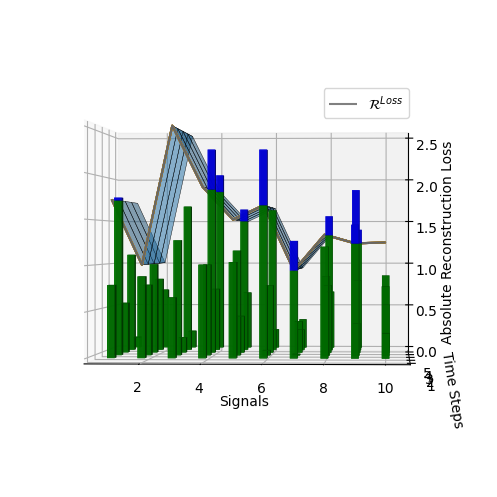

/tmp/ipykernel_25092/1237506143.py:105: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


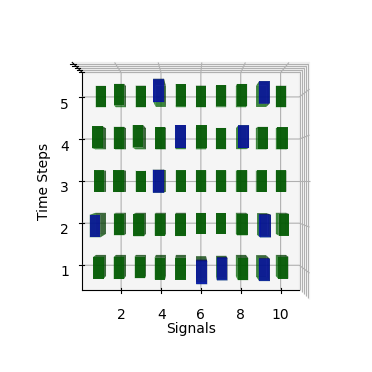

In [530]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# setup the figure and axes---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

# Grid data...10
x = np.arange(1,m+1,1)
y = np.arange(1,w+1,1)
X, Y = np.meshgrid(x, y)
x_pos, y_pos = X.flatten(), Y.flatten()
z_pos = np.zeros_like(x_pos)
# ---- others ---

# Define size of the bars
side = 0.25
width = depth = side
total_bars = len(x_pos)

# Define data------------------------------
# Data for 3D plot
heights_total = recon_loss.values.flatten()
thresholds2d = r_loss_mat.values
thresholds = thresholds2d.flatten()
violation_index = np.where(heights_total > thresholds)[0]

# Split data/heights and colors in two parts
color1 = 'green'
color2 = 'blue'

colors = {}
colors[1] = np.array([color1]*total_bars)
colors[2] = colors[1].copy()
colors[2][violation_index] = color2

# Split data/heights and colors in two parts
heights = {}
heights[1] = heights_total
heights[2] = heights_total - thresholds
heights[1][violation_index] = thresholds[violation_index]
heights[2][heights[2] < 0] = 0


for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos-side/2, y_pos - side/2, z_pos, width, depth, heights[i], shade=True, alpha = 0.85, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.set_zlabel('Absolute Reconstruction Loss')


# width = depth = 0.75
# ax.bar3d(x_pos, y_pos, wrap, 1, 1, 0.01, shade=True, alpha = 0.90) #, color = ['orange'', 'green']*50)

#-------------------------
# Surface plot
surf = ax.plot_surface(X, Y, thresholds2d, alpha=0.50,
                       linewidth=0.30, antialiased=True, rstride=1,cstride=1, edgecolors='k')
cs = ax.contour(X, Y, thresholds2d, zdir='y',marker = '*', offset = 1, cmap=cm.Dark2)
h1,l1 = cs.legend_elements()
h1[0].set_color('gray')
plt.legend([h1[0]], ['$\mathcal{R}^{Loss}$'], bbox_to_anchor = (0.85, 0.85))



# View of angle....
ax.view_init(0, 273)
#---------------------

# Saving image...
plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
plt.show()



# Adding second figure with top view........-----------------------------------------------------------
# setup the figure and axes---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

side = 0.50
width = depth = side

for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos - side/2, y_pos- side/2, z_pos, width, depth, heights[i]
    , shade=True, alpha = 0.50, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.zaxis.set_ticklabels([])

# View of angle....
ax.view_init(90, 270)
#---------------------

# Saving image...
plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
plt.show()

In [526]:
recon_loss

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
Time_step_1,0.787657,0.881472,0.653022,1.009001,1.036979,2.249741,1.266063,1.203831,1.439894,0.772350
Time_step_2,1.746190,0.777529,1.273515,1.003496,1.158335,0.054436,0.013075,0.870091,1.826753,0.881947
Time_step_3,0.559301,1.000790,0.168902,2.302077,0.412166,0.761141,0.353110,0.764866,0.328042,0.217877
Time_step_4,1.104628,0.822658,1.664375,0.706308,1.630272,1.621213,0.235155,1.552193,0.807686,0.524424
Time_step_5,0.118808,0.683496,0.191968,2.046919,0.650050,0.211758,0.330199,0.660644,1.398923,0.170091


In [527]:
r_loss_mat

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
Time_step_1,1.716348,1.007551,2.51295,1.850696,1.495614,1.651846,0.947171,1.332918,1.239473,1.24948
Time_step_2,1.716348,1.007551,2.51295,1.850696,1.495614,1.651846,0.947171,1.332918,1.239473,1.24948
Time_step_3,1.716348,1.007551,2.51295,1.850696,1.495614,1.651846,0.947171,1.332918,1.239473,1.24948
Time_step_4,1.716348,1.007551,2.51295,1.850696,1.495614,1.651846,0.947171,1.332918,1.239473,1.24948
Time_step_5,1.716348,1.007551,2.51295,1.850696,1.495614,1.651846,0.947171,1.332918,1.239473,1.24948


In [528]:
(recon_loss > r_loss_mat)

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
Time_step_1,False,False,False,False,False,True,True,False,True,False
Time_step_2,True,False,False,False,False,False,False,False,True,False
Time_step_3,False,False,False,True,False,False,False,False,False,False
Time_step_4,False,False,False,False,True,False,False,True,False,False
Time_step_5,False,False,False,True,False,False,False,False,True,False


<AxesSubplot: >

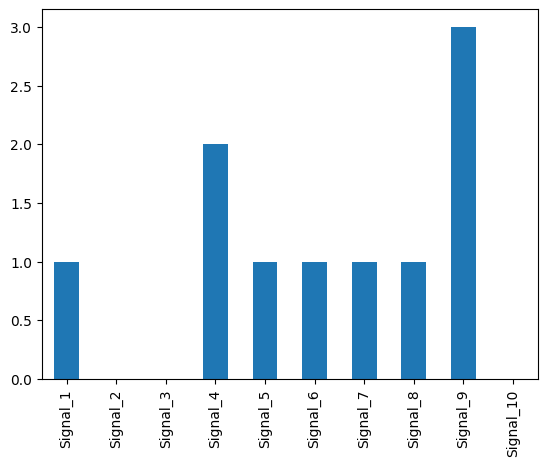

In [529]:
(recon_loss > r_loss_mat).sum().plot.bar()

In [500]:
r_loss_mat

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
Time_step_1,1.086292,1.162676,1.244475,2.104858,1.291679,1.20748,2.219495,1.162043,1.899174,1.884614
Time_step_2,1.086292,1.162676,1.244475,2.104858,1.291679,1.20748,2.219495,1.162043,1.899174,1.884614
Time_step_3,1.086292,1.162676,1.244475,2.104858,1.291679,1.20748,2.219495,1.162043,1.899174,1.884614
Time_step_4,1.086292,1.162676,1.244475,2.104858,1.291679,1.20748,2.219495,1.162043,1.899174,1.884614
Time_step_5,1.086292,1.162676,1.244475,2.104858,1.291679,1.20748,2.219495,1.162043,1.899174,1.884614


In [480]:
time_vio = pd.DataFrame((recon_loss > r_loss_mat).astype(int).sum()/w).T
time_vio
# time_vio.columns = [f"{i+1}" for i in range(m)]

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
0,0.4,0.2,0.0,0.0,0.6,0.2,0.0,0.0,0.0,0.0


In [481]:
r_time_mat

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10
0,1.078326,2.327903,0.354624,0.299071,1.19882,1.882316,0.797281,0.464743,0.518681,0.208715


/tmp/ipykernel_25092/2370057113.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


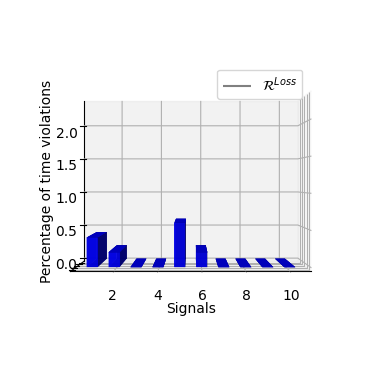

/tmp/ipykernel_25092/2370057113.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


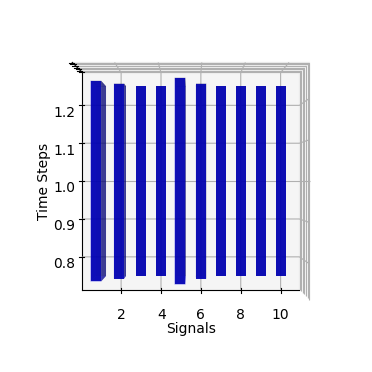

In [498]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# setup the figure and axes---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

m = m
w = 1
# Grid data...10
x = np.arange(1,m+1,1)
y = np.arange(1,w+1,1)
X, Y = np.meshgrid(x, y)
x_pos, y_pos = X.flatten(), Y.flatten()
z_pos = np.zeros_like(x_pos)
# ---- others ---

# Define size of the bars
side = 0.50
width = depth = side
total_bars = len(x_pos)

# Define data------------------------------
# Data for 3D plot
heights_total = time_vio.values.flatten()
thresholds2d = r_time_mat.values
thresholds = thresholds2d.flatten()
violation_index = np.where(heights_total > thresholds)[0]

# Split data/heights and colors in two parts
color1 = 'blue'
color2 = 'orange'

colors = {}
colors[1] = np.array([color1]*total_bars)
colors[2] = colors[1].copy()
colors[2][violation_index] = color2

# Split data/heights and colors in two parts
heights = {}
heights[1] = heights_total
heights[2] = heights_total - thresholds
heights[1][violation_index] = thresholds[violation_index]
heights[2][heights[2] < 0] = 0


for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos-side/2, y_pos - side/2, z_pos, width, depth, heights[i], shade=True, alpha = 0.85, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
# ax.set_ylabel('Time Steps')
ax.set_zlabel('Percentage of time violations')
ax.yaxis.set_ticklabels([])



# width = depth = 0.75
# ax.bar3d(x_pos, y_pos, wrap, 1, 1, 0.01, shade=True, alpha = 0.90) #, color = ['orange'', 'green']*50)

#-------------------------
# Surface plot
surf = ax.plot_surface(X, Y, thresholds2d, alpha=0.50,
                       linewidth=0.30, antialiased=True, rstride=1,cstride=1, edgecolors='k')
# cs = ax.contour(X, Y, thresholds2d, zdir='y',marker = '*', offset = 1, cmap=cm.Dark2)
h1,l1 = cs.legend_elements()
h1[0].set_color('gray')
plt.legend([h1[0]], ['$\mathcal{R}^{Loss}$'], bbox_to_anchor = (0.85, 0.85))



# View of angle....
ax.view_init(0, 270)
#---------------------

# Saving image...
plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
plt.show()



# Adding second figure with top view........-----------------------------------------------------------
# setup the figure and axes---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

side = 0.50
width = depth = side

for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos - side/2, y_pos- side/2, z_pos, width, depth, heights[i]
    , shade=True, alpha = 0.50, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.zaxis.set_ticklabels([])

# View of angle....
ax.view_init(90, 270)
#---------------------

# Saving image...
plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
plt.show()

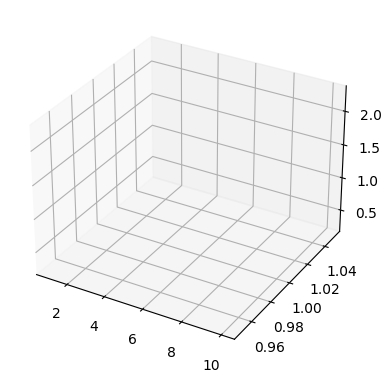

In [493]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, thresholds2d, alpha=0.50,
                       linewidth=0.30, antialiased=True, rstride=1,cstride=1, edgecolors='k')
plt.show()

In [487]:
thresholds2d

array([[1.07832638, 2.32790272, 0.35462353, 0.29907098, 1.19882023,
        1.88231645, 0.79728137, 0.46474299, 0.51868122, 0.20871502]])

In [469]:
# width = depth = 0.50
# # setup the figure and axes
# fig = plt.figure(figsize=(7, 5))
# ax = fig.add_subplot(121, projection='3d')
# # -------- done---------------------
# ax.bar3d(y_bar, x_bar, bottom, width, depth, top, shade=True, alpha = 0.85, color = colors) #, color = ['orange'', 'green']*50)
# ax.set_xlabel('Signals')
# ax.set_ylabel('Time Steps')
# #--------------------------------------
# ax.zaxis.set_ticklabels([])

# ax.view_init(90, 270)
# plt.tight_layout()
# plt.savefig(f'plots/recon_loss_2d.jpg', dpi = 350)
# plt.show()


In [ ]:
time_vio = pd.DataFrame((recon_loss > r_loss_mat).astype(int).sum()/w).T
# time_vio.columns = [f"{i+1}" for i in range(m)]

In [ ]:
colors = pd.Series(['blue'] * m, dtype=str).astype(str) 

red_pos = time_vio.values.flatten() > r_time.values.flatten()
green_pos = time_vio.values.flatten() == 0

colors[red_pos] = 'orange'
colors[green_pos] = 'green'
colors = colors.values.tolist()
colors


In [ ]:
fig = plt.figure(figsize=(5, 2))
ax = fig.add_subplot(121)
sns.barplot(data = time_vio + 0.05, palette = colors, alpha = 0.85, ax = ax)
ax.set_xlabel("Signal")
ax.set_ylabel("Time violation (%)")
# ax.set_xticks()

# ax1 = ax.twinx()
data = r_time.T
data.columns = ['$\mathcal{R}^{Time}$']
sns.lineplot(data = data, color = 'orange', alpha = 0.85, marker = 'p', ax = ax)
ax.set_xticklabels([f"{i+1}" for i in range(w)])
# g.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])

# ax1.set_xticks(signals, rotation = 90)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(f'plots/recon_loss_time.jpg', dpi = 350)
plt.show()

In [ ]:
signal_vio = pd.DataFrame(pd.Series(colors).value_counts()/w)
signal_vio = signal_vio.sort_index()
# signal_vio.columns 

try:
    signal_vio.loc['orange']
except:
    signal_vio.loc['orange'] = 0.02

signal_vio


In [ ]:
dict_rename = {'green' : 'No violation', 'blue' : 'Loss only', 'orange' : 'Time step'}
signal_vio = signal_vio.rename(index=dict_rename)
signal_vio

In [ ]:
# signal_vio.index = ['No violation', 'Loss only', 'Time step']
signal_vio.columns = ['Types of Violation']
signal_vio

In [ ]:
signal_vio.sort_index()

In [ ]:
r_signal_th = 0.10 #r_signal.values[0][0]

In [ ]:
r_signal_df = pd.DataFrame([[np.nan, np.nan, r_signal_th]])
r_signal_df.columns = ['No violation', 'Loss only', 'Time step']
# r_signal.index = ['Time step']
# r_signal[['No violation', 'Loss only']] = np.nan
r_signal_df = r_signal_df.T.sort_index().T
r_signal_df

In [ ]:
palette = ['green', 'blue', 'orange']
palette[-1] = 'red' if signal_vio.loc['Time step'].values[0] > r_signal_th else 'orange'
palette

In [ ]:
r_signal_df = r_signal_df[['No violation', 'Loss only', 'Time step']]
r_signal_df

In [ ]:
#-------
fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot(121)

sns.barplot(data = signal_vio.T, palette = palette, ax = ax)
# sns.pointplot(data=r_signal_df, join=False, color='purple', label= '$\mathcal{R}^{Signal}$', ax=ax) #, zorder=1)
# plt.legend()
ax.set_xlabel("Types of Violation")
ax.set_ylabel("Percentage of Signals (%)")

ax.plot([1.5, 2.5], [r_signal_th, r_signal_th], "k--", label= '$\mathcal{R}^{Signal}$')
plt.legend()


plt.tight_layout()
plt.savefig(f'plots/recon_loss_signal.jpg', dpi = 350)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")
ax.set_xlim3d(0,10)
ax.set_ylim3d(0,10) 

xpos = [2,5,8,2,5,8,2,5,8]
ypos = [1,1,1,5,5,5,9,9,9]

zpos = np.zeros(9)
dx = np.ones(9)*2
dy = np.ones(9)*2

dz = [np.random.random(9) for i in range(4)]  # the heights of the 4 bar sets

_zpos = zpos   # the starting zpos for each bar

colors = ['r', 'b', 'g', 'y']
for i in range(4):
    ax.bar3d(xpos, ypos, _zpos+i*2, dx, dy, dz[i], color=colors[i], alpha = 0.25)
    _zpos += dz[i]    # add the height of each bar to know where to start the next

plt.gca().invert_xaxis()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# setup the figure and axes---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

# Grid data...10
x = np.arange(1,m+1,1)
y = np.arange(1,w+1,1)
X, Y = np.meshgrid(x, y)
x_pos, y_pos = X.flatten(), Y.flatten()
z_pos = np.zeros_like(x_pos)
# ---- others ---

# Define size of the bars
side = 0.25
width = depth = side
total_bars = len(x_pos)

# Define data------------------------------
# Data for 3D plot
heights_total = recon_loss.T.values.flatten()
thresholds2d = r_loss_mat.values
thresholds = thresholds2d.flatten()
violation_index = np.where(heights_total > thresholds)[0]

# Split data/heights and colors in two parts
color1 = 'green'
color2 = 'blue'

colors[1] = np.array([color1]*total_bars)
colors[2] = colors[1].copy()
colors[2][violation_index] = color2

# Split data/heights and colors in two parts
heights = {}
heights[1] = heights_total
heights[2] = heights_total - thresholds
heights[1][violation_index] = thresholds[violation_index]
heights[2][heights[2] < 0] = 0


for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos-side/2, y_pos - side/2, z_pos, width, depth, heights[i], shade=True, alpha = 0.85, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.set_zlabel('Absolute Reconstruction Loss')


# width = depth = 0.75
# ax.bar3d(x_pos, y_pos, wrap, 1, 1, 0.01, shade=True, alpha = 0.90) #, color = ['orange'', 'green']*50)

#-------------------------
# Surface plot
surf = ax.plot_surface(X, Y, thresholds2d, alpha=0.50,
                       linewidth=0.30, antialiased=True, rstride=1,cstride=1, edgecolors='k')
cs = ax.contour(X, Y, thresholds2d, zdir='y',marker = '*', offset = 1, cmap=cm.Dark2)
h1,l1 = cs.legend_elements()
h1[0].set_color('gray')
plt.legend([h1[0]], ['$\mathcal{R}^{Loss}$'], bbox_to_anchor = (0.85, 0.85))



# View of angle....
ax.view_init(0, 273)
#---------------------

# Saving image...
plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
plt.show()



# Adding second figure with top view........-----------------------------------------------------------
# setup the figure and axes---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

side = 0.50
width = depth = side

for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos - side/2, y_pos- side/2, z_pos, width, depth, heights[i]
    , shade=True, alpha = 0.50, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.zaxis.set_ticklabels([])

# View of angle....
ax.view_init(90, 270)
#---------------------

# Saving image...
plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
plt.show()

In [ ]:
height[i+1]

In [ ]:
z_pos

In [ ]:
height

In [ ]:
colors_dict = 
colors_dict

In [ ]:
#height[1][height[1] > wrap] = wrap[height[1] > wrap]
wrap

In [ ]:
zpos = np.zeros(9)

dx = np.ones(9)
dy = np.ones(9)


In [ ]:
ax.bar3d(y_bar, x_bar, bottom, width, depth, top, shade=True, alpha = 0.85, color = colors) #, color = ['orange'', 'green']*50)
ax.bar3d(xpos, ypos, _zpos, dx, dy, dz[i], color=colors[i])

